# 원, 삼각형, 사각형 구분하기
## 구글 코랩에서 작업
## 2. 어려운 테스트 문제를 기존 CNN 모델로 푸는 경우

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

### 데이터 준비하기

In [26]:
!unzip 2017-3-8-CNN_Data_Augmentation_hard_handwriting_shape.zip

Archive:  2017-3-8-CNN_Data_Augmentation_hard_handwriting_shape.zip
   creating: hard_handwriting_shape/
  inflating: hard_handwriting_shape/.DS_Store  
   creating: __MACOSX/hard_handwriting_shape/
  inflating: __MACOSX/hard_handwriting_shape/._.DS_Store  
   creating: hard_handwriting_shape/test/
  inflating: hard_handwriting_shape/test/.DS_Store  
   creating: __MACOSX/hard_handwriting_shape/test/
  inflating: __MACOSX/hard_handwriting_shape/test/._.DS_Store  
   creating: hard_handwriting_shape/test/circle/
  inflating: hard_handwriting_shape/test/circle/.DS_Store  
   creating: __MACOSX/hard_handwriting_shape/test/circle/
  inflating: __MACOSX/hard_handwriting_shape/test/circle/._.DS_Store  
  inflating: hard_handwriting_shape/test/circle/circle021.png  
  inflating: __MACOSX/hard_handwriting_shape/test/circle/._circle021.png  
  inflating: hard_handwriting_shape/test/circle/circle022.png  
  inflating: __MACOSX/hard_handwriting_shape/test/circle/._circle022.png  
  inflating: har

### 데이터셋 생성하기

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


### 모델 구성하기

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

### 모델 그래프로 보기

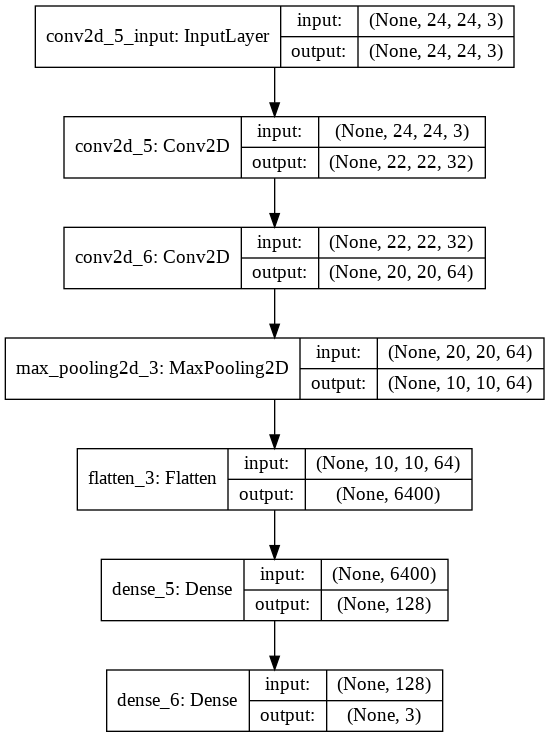

In [29]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)    # to_file='filename.png'

### 모델 학습과정 설정하기

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델 학습시키기
- 첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 train_generator으로 지정.
- steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정. 총 45개의 훈련 샘플이 있고 배치사이즈가 3이므로 15 스텝으로 지정.
- epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정. 100번을 반복적으로 학습.
- validation_data : 검증데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 validation_generator으로 지정.
- validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정. 홍 15개의 검증 샘플이 있고 배치사이즈가 3이므로 5 스텝으로 지정.

In [31]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/200
15/15 [==============================] - 1s 50ms/step - loss: 1.1805 - acc: 0.5778 - val_loss: 1.1655 - val_acc: 0.3333
Epoch 2/200
15/15 [==============================] - 0s 25ms/step - loss: 0.2952 - acc: 0.9556 - val_loss: 2.3212 - val_acc: 0.4000
Epoch 3/200
15/15 [==============================] - 0s 27ms/step - loss: 0.0420 - acc: 1.0000 - val_loss: 3.9705 - val_acc: 0.3333
Epoch 4/200
15/15 [==============================] - 0s 28ms/step - loss: 0.0227 - acc: 0.9778 - val_loss: 4.0078 - val_acc: 0.3333
Epoch 5/200
15/15 [==============================] - 0s 29ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 4.2440 - val_acc: 0.3333
Epoch 6/200
15/15 [==============================] - 0s 25ms/step - loss: 5.3384e-04 - acc: 1.0000 - val_loss: 4.4881 - val_acc: 0.3333
Epoch 7/200
15/15 [==============================] - 0s 28ms/step - loss: 2.0227e-04 - acc: 1.0000 - val_loss: 4.6026 - val_acc: 0.3333
Epoch 8/200
15/15 [==============================] - 0s 26ms/step - 

### 모델 평가하기

In [32]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 33.33%


### 모델 사용하기

In [33]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 0.000 1.000]
 [0.296 0.008 0.695]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.042 0.958]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.015 0.985]
 [0.000 0.000 1.000]
 [0.017 0.000 0.982]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.183 0.002 0.815]]
